<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Means" data-toc-modified-id="K-Means-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-Means</a></span><ul class="toc-item"><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Plotando-os-Dados" data-toc-modified-id="Plotando-os-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotando os Dados</a></span></li><li><span><a href="#Treinando-o-Modelo" data-toc-modified-id="Treinando-o-Modelo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Treinando o Modelo</a></span></li></ul></li></ul></div>

## Método usado

K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Então, o algoritmo itera através de duas etapas:
Reatribui pontos ao cluster cujo centroide é o mais próximo e calcula o novo centróide de cada cluster. Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida. A variação dentro do cluster é calculada como a soma da distância euclidiana entre os pontos de dados e seus respectivos centroides do cluster.


## K-Means

## Importa bibliotecas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warn
warn.filterwarnings('ignore')
%matplotlib inline

### Explorando os Dados 

In [2]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import scipy.io as sio

# Lendo dados
data = sio.loadmat('ex7data1.mat')

# Verificando output
data

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

Temos apenas os dados de entrada X, uma vez que se trata de um modelo de aprendizagem não supervisionada.

In [3]:
# Indexando X e verificando dimensões
X = data['X']

print(f'Dimensões de X: {X.shape}')

Dimensões de X: (50, 2)


In [4]:
# Transformando em dataframe
df = pd.DataFrame(X, columns=['x1', 'x2'])
df.head()

,x1,x2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [5]:
# Inicializando centroides
initial_c = np.array([3, 3, 6, 2, 8, 5]).reshape(3, 2)
initial_c

array([[3, 3],
       [6, 2],
       [8, 5]])

### Plotando os Dados

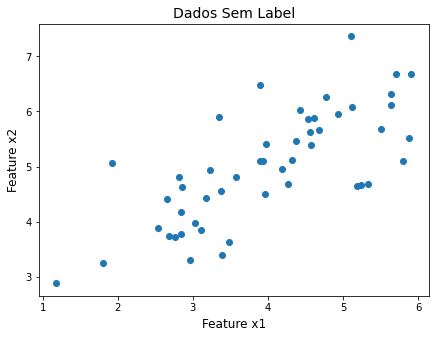

In [6]:
# Importando bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(figsize=(7, 5))
ax.scatter(df['x1'], df['x2'])
ax.set_title('Dados Sem Label', size=14)
ax.set_xlabel('Feature x1', size=12, labelpad=5)
ax.set_ylabel('Feature x2', size=12, labelpad=5)
plt.show()

### Treinando o Modelo

In [7]:
# Importando biblioteca
from sklearn.cluster import KMeans

# Inicializando agrupador
X = df.iloc[:, :].values
k_means = KMeans(n_clusters=3, init='random')
k_means.fit(X)
y_pred = k_means.predict(X)

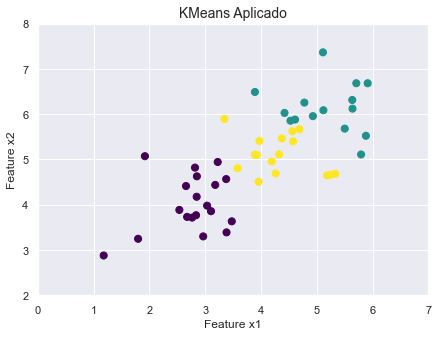

In [8]:
# Visualizando resultado
import seaborn as sns

sns.set()
sns.set_style('darkgrid')
fix, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
ax.set_title('KMeans Aplicado', size=14)
ax.set_xlabel('Feature x1', size=12, labelpad=5)
ax.set_ylabel('Feature x2', size=12, labelpad=5)
ax.set_xlim(0, 7)
ax.set_ylim(2, 8)
plt.show()

Percebemos o quão simples foi agrupar os dados em três conjuntos diferentes. Vamos realizar a mesma análise com dois cluters.

In [9]:
int(X[:, 1].min())

2

In [10]:
# Definindo função para plotagem dos dados agrupados 
def plotKMeans(X, y_kmeans, centers):
    """docstring for plotKMeans
    função responsável pela plotagem dos dados já agrupados pelo algoritmo KMeans
    Input:
        X: dados a serem agrupados
        y_kmeans: predição de dados já agrupados
        centers: centróide de cada cluster"""
    
    # Configurando e realizando plotagem
    sns.set()
    sns.set_style('darkgrid')
    fix, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.set_title('KMeans Aplicado', size=14)
    ax.set_xlabel('Feature x1', size=12, labelpad=5)
    ax.set_ylabel('Feature x2', size=12, labelpad=5)
    ax.set_xlim(int(X[:, 0].min())-1, round(X[:, 0].max())+1)
    ax.set_ylim(int(X[:, 1].min()), round(X[:, 1].max())+1)
    plt.show()

In [11]:
# Definindo função para facilitar a análise
def clusterData(X, n_clusters):
    """docstring for clusterData
    função responsável por realizar o treinamento de modelo KMeans e plotar os resultados
    de acordo com o número de cluster informado como parâmetro
    Input:
        X: dados a serem agrupados;
        n_cluster: número de clusters do algoritmo"""
    
    # Realizando treinamento
    k_means = KMeans(n_clusters=n_clusters, init='random')
    k_means.fit(X)
    
    # Predizendo dados e plotando resultado
    y_kmeans = k_means.predict(X)
    centers = k_means.cluster_centers_
    plotKMeans(X, y_kmeans, centers)

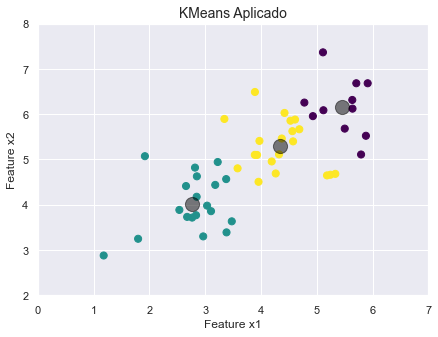

In [12]:
# Chamando função
clusterData(X, 3)

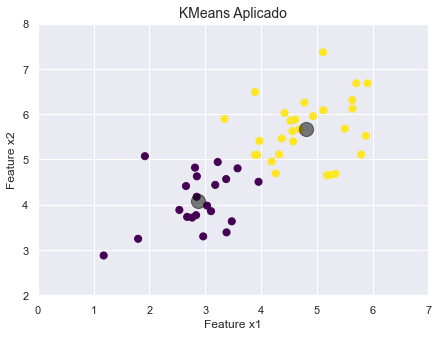

In [13]:
# Dois clusters
clusterData(X, 2)

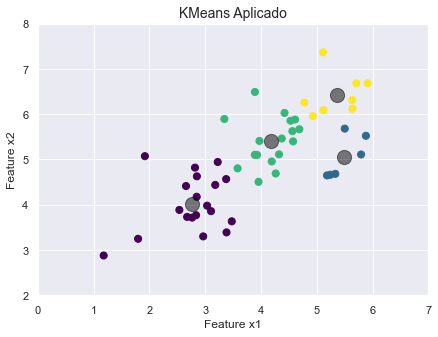

In [14]:
# Quatro clusters
clusterData(X, 4)


# K-means Clustering


Os gráficos mostram primeiramente o que um algoritmo K-significa produziria
usando três clusters. Então é mostrado qual o efeito de uma má
a inicialização está no processo de classificação:
Ao definir n_init para apenas 1 (o padrão é 10), a quantidade de
vezes que o algoritmo será executado com diferentes centróides
sementes é reduzida.
O próximo gráfico mostra o que o uso de oito clusters forneceria
e finalmente a verdade básica.

Automatically created module for IPython interactive environment


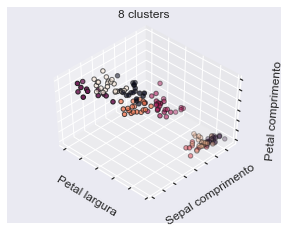

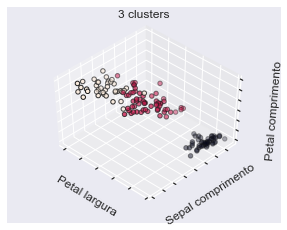

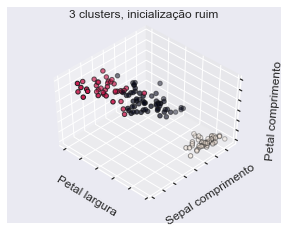

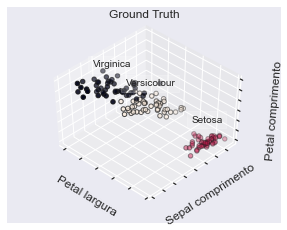

In [15]:
%matplotlib inline

print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
# Embora a seguinte importação não esteja sendo usada diretamente, é necessária
# para que a projeção 3D funcione
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, inicialização ruim']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal largura')
    ax.set_ylabel('Sepal comprimento')
    ax.set_zlabel('Petal comprimento')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal largura')
ax.set_ylabel('Sepal comprimento')
ax.set_zlabel('Petal comprimento')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

# Exemplo 2
## Cria dados

In [16]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualizando os dados data

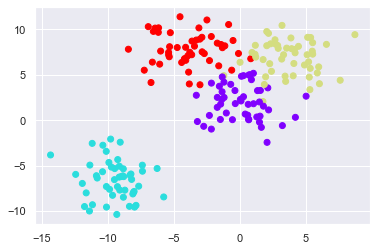

In [17]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Criando os clusters

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)

In [20]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [21]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [22]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3,
       0, 1])

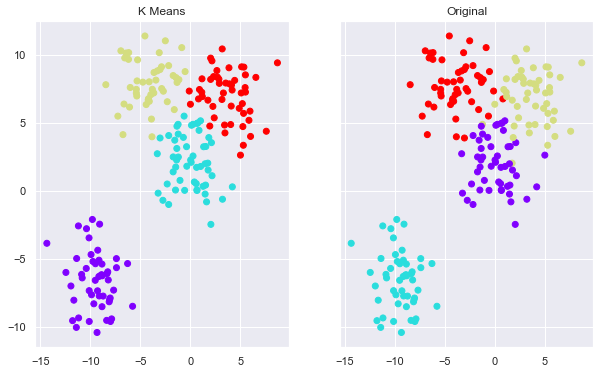

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

Você deve notar que as cores não têm relação entre as duas parcelas

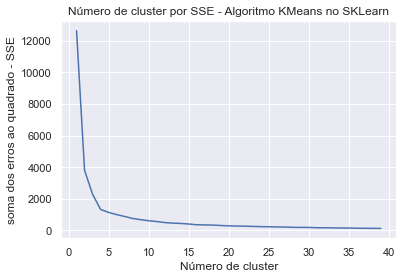

In [24]:
#vamos encontrar um k adequado
sse = {}
faixa = range(1,40)
for kclusters in faixa:
    kmeans1 = KMeans(n_clusters=kclusters)
    kmeans1.fit(data[0])
    sse[kclusters] = kmeans1.inertia_ # Inertia: Soma das distâncias das amostras ao centro de aglomerado mais próximo

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de cluster")
plt.ylabel("soma dos erros ao quadrado - SSE")
plt.title("Número de cluster por SSE - Algoritmo KMeans no SKLearn")
plt.show()

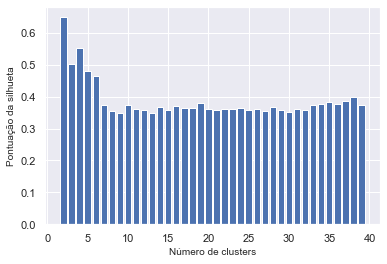

In [26]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
faixa=range(2, 40)
for n_cluster in faixa:
    silhouette_scores.append( 
        silhouette_score(data[0], KMeans(n_clusters = n_cluster).fit_predict(data[0]))) 
    
# Plotando um gráfico de barras para comparar os resultados
k = list(faixa) 
plt.bar(k, silhouette_scores) 
plt.xlabel('Número de clusters', fontsize = 10) 
plt.ylabel('Pontuação da silhueta', fontsize = 10) 
plt.show() 